In [1]:
%pylab inline
import sys
from time import time
from __future__ import division
import numpy as np
import pandas as pd
import pickle

import matplotlib as pl

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import fill_between
matplotlib.rcParams['figure.figsize'] = (10.0,10.0)



def plotSaveFig(title,xAxisLabel, yAxisLabel):
    plt.title (title, fontsize = 25,fontweight="bold")
    plt.xlabel(xAxisLabel,fontsize = 20)
    plt.ylabel(yAxisLabel, fontsize = 20)
    plt.annotate("AUTHOR: Karan Sagoo",xy = (0,0),xycoords='axes fraction',alpha = 0.1, fontsize = 20)
    plt.legend()
    savefig(title, bbox_inches='tight')

Populating the interactive namespace from numpy and matplotlib


In [3]:
### Load the dictionary containing the dataset
### The data that I am loading in here is the one that has be cleansed of outliers. 
### For more information on that, refer to the notebook titled "cleanDataForOutliers" in the same folder.
data_dict_path = "/Users/karansagoo/PycharmProjects/Resume/ENRON_final1/data/final_project_dataset.pkl"
with open(data_dict_path, "r") as data_file:
    data_dict = pickle.load(data_file)

In [5]:
from feature_format import featureFormat, targetFeatureSplit
allFeatures = ['poi', 
'bonus','deferral_payments',
'deferred_income', 'director_fees','exercised_stock_options','expenses',
'from_messages','from_poi_to_this_person','from_this_person_to_poi',
'loan_advances','long_term_incentive','other','restricted_stock','restricted_stock_deferred', 'salary',
'shared_receipt_with_poi','to_messages','total_payments','total_stock_value']

# 'email_address' I took out this feature because it could not be converted to an int or float

mydata = featureFormat(data_dict, allFeatures, remove_NaN=False, remove_all_zeroes=False, remove_any_zeroes=False)

In [138]:
df = pd.DataFrame(mydata)
df.columns = allFeatures

df.head(5);

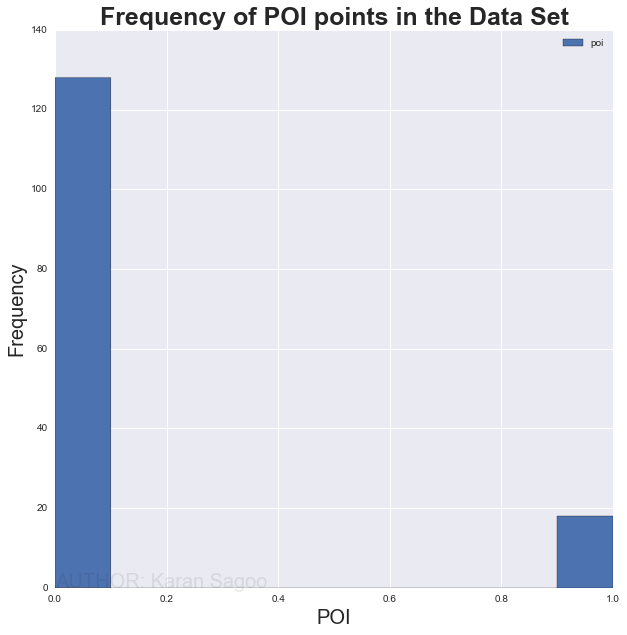

In [147]:
p = df['poi'].plot(kind = 'hist')

plotSaveFig("Frequency of POI points in the Data Set", "POI", "Frequency")

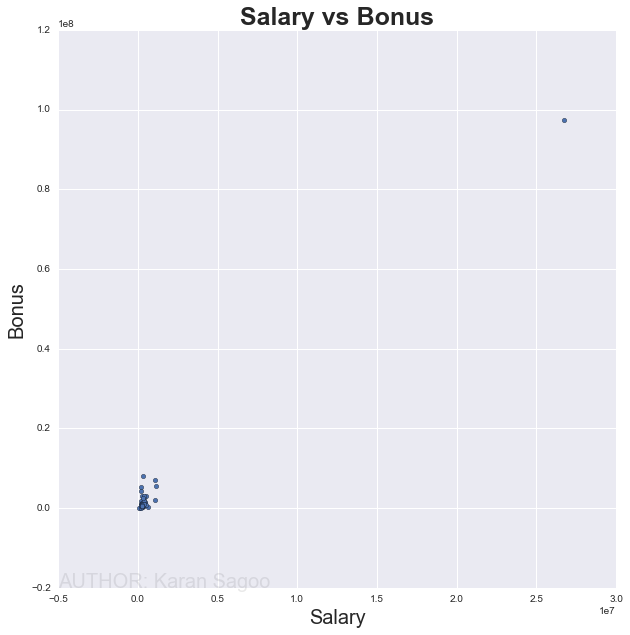

In [148]:
# outlier removal plot
p =df.plot(x = 'salary', y = 'bonus', kind = 'scatter')
plotSaveFig("Salary vs Bonus", "Salary" ,"Bonus")

In [55]:
#identifying the index of the outlier
df.loc[df['salary'] > 2.0*1e7]

,poi,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
104,0.0,97343619.0,32083396.0,-27992891.0,1398517.0,311764000.0,5235198.0,NaN,NaN,NaN,83925000.0,48521928.0,42667589.0,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0


In [ ]:
#investigating the pdf, we see that it was data entry mistake as it was total column

In [58]:
#removing it
df = df.drop(104)
df = df.reset_index(drop = True)

In [105]:
df.loc[104];

TypeError: plotSaveFig() takes exactly 3 arguments (4 given)

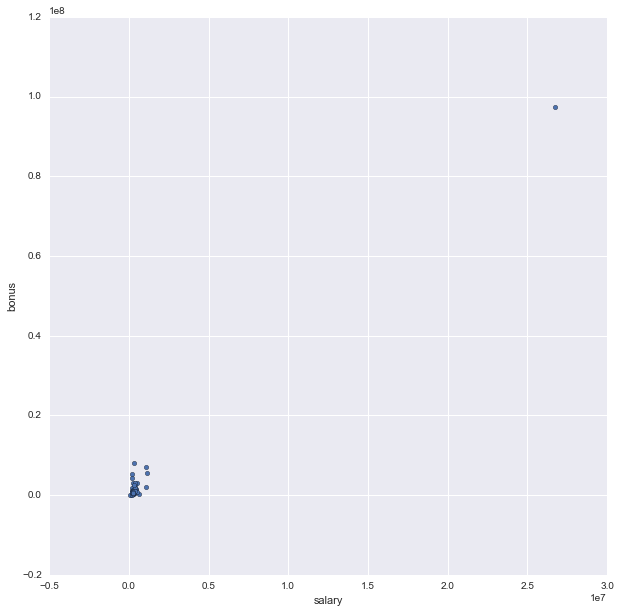

In [149]:
#plotting again
p =df.plot(x = 'salary', y = 'bonus', kind = 'scatter')
plotSaveFig(p,"Salary vs Bonus (Outlier Removed)", "Salary" ,"Bonus")

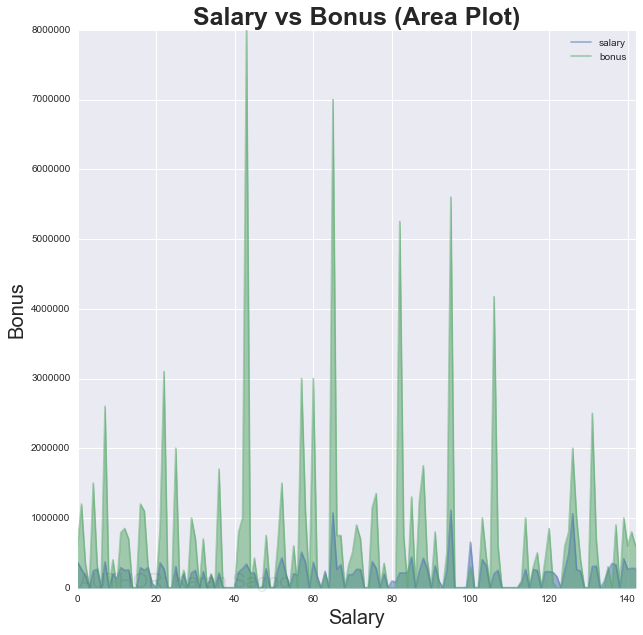

In [110]:
# further investigationdf

p=df[['salary','bonus']].plot.area(stacked = False)
plotAndSaveFig("Salary vs Bonus (Area Plot)", "Salary" ,"Bonus")

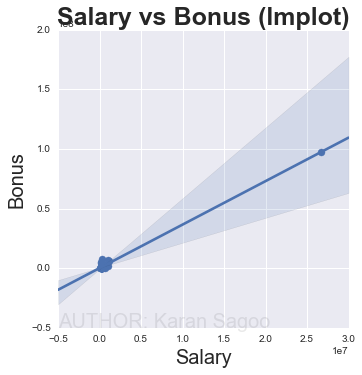

In [150]:
sns.lmplot(x="salary", y="bonus", data = df ,x_estimator=np.mean)

plotSaveFig("Salary vs Bonus (lmplot)", "Salary" ,"Bonus")

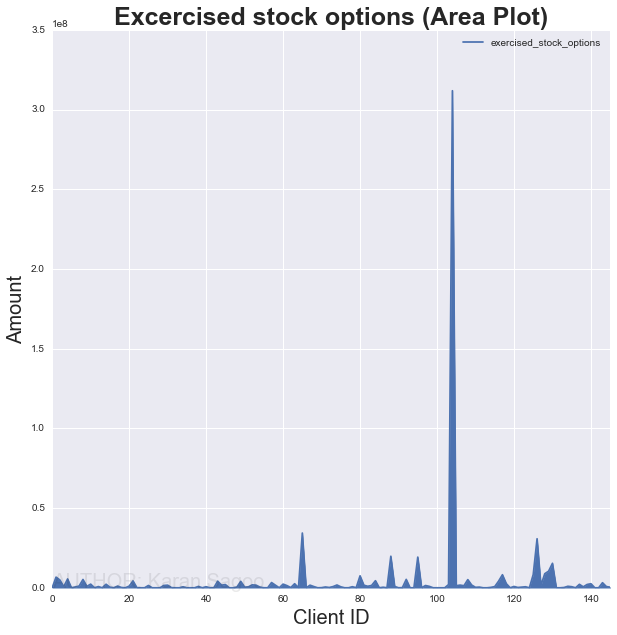

In [151]:
df['exercised_stock_options'].describe()
p = df[['exercised_stock_options']].plot.area(stacked = True)
plotSaveFig("Excercised stock options (Area Plot)","Client ID" , "Amount")

In [168]:
data_dict['METTS MARK']

{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}

In [130]:
del data_dict['TOTAL']

In [131]:
print len (data_dict.keys())

In [143]:
import pprint
pprint.pprint (data_dict['ALLEN PHILLIP K']['bonus'])

4175000


In [181]:
names = []
frames = []

for name, nameValues in data_dict.iteritems():
    names.append(name)
    featureValues = pd.DataFrame.from_dict(nameValues, orient = 'index').transpose()
    featureValues["name"] = name
    frames.append(featureValues)
d1 = pd.concat(frames)
d1 = d1.reset_index()
del d1['index']
# d1.info()

In [171]:
# df.info();

In [182]:
d2 = d1
d2.dropna(axis = 0, how = "all", inplace=True)
d1.columns

Index([u'salary', u'to_messages', u'deferral_payments', u'total_payments',
       u'exercised_stock_options', u'bonus', u'restricted_stock',
       u'shared_receipt_with_poi', u'restricted_stock_deferred',
       u'total_stock_value', u'expenses', u'loan_advances', u'from_messages',
       u'other', u'from_this_person_to_poi', u'poi', u'director_fees',
       u'deferred_income', u'long_term_incentive', u'email_address',
       u'from_poi_to_this_person', u'name'],
      dtype='object')

In [183]:
d11 = d1
for i in d1.columns:
   
        
    if  i != "name" and i != "email_address":
        d11[i] = d1[i].astype(float)
    # if i != "name":
    #     d11[i] = d1[i].astype(float)

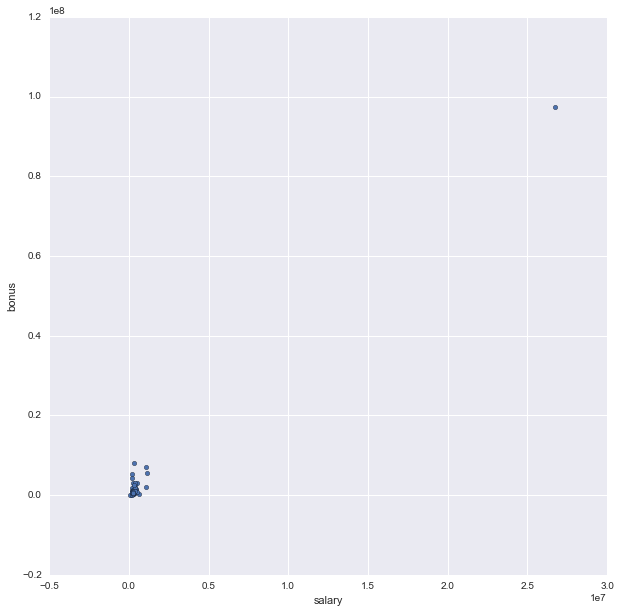

In [177]:
d11.plot(x = 'salary', y = 'bonus', kind = 'scatter');

In [184]:
d11.loc[d11["salary"] > 2*1e7]
d11.drop(104)
dfp =d11.reset_index(drop = True)
# d11.head()

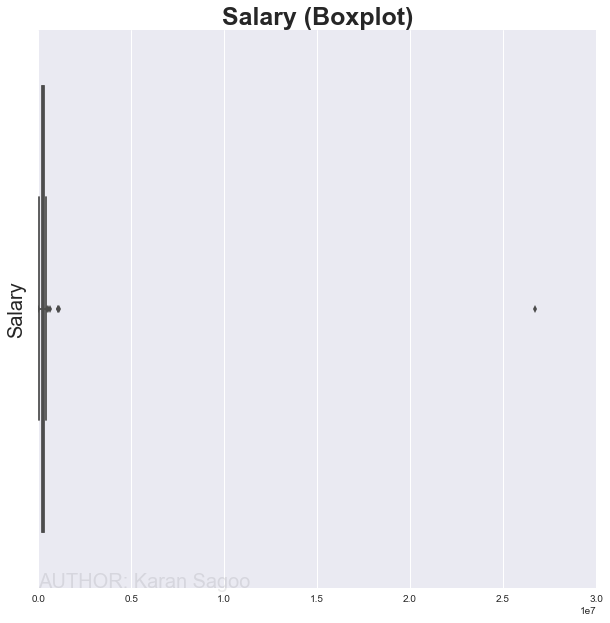

In [193]:
p = sns.boxplot(x = dfp["salary"])
plotSaveFig("Salary (Boxplot)", "","Salary")

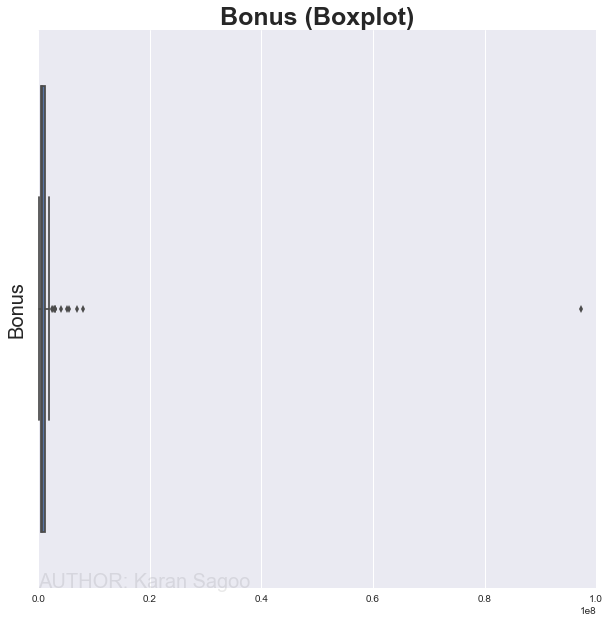

In [194]:
p =sns.boxplot(x = dfp["bonus"])
plotSaveFig("Bonus (Boxplot)", "","Bonus")

In [195]:
dfp.loc[df["bonus"]> 0.8*1e8]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,name
104,26704229.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,...,NaN,42667589.0,NaN,0.0,1398517.0,-27992891.0,48521928.0,NaN,NaN,TOTAL


In [196]:
dfp = dfp.drop(104)
dfp = dfp.reset_index(drop = True)

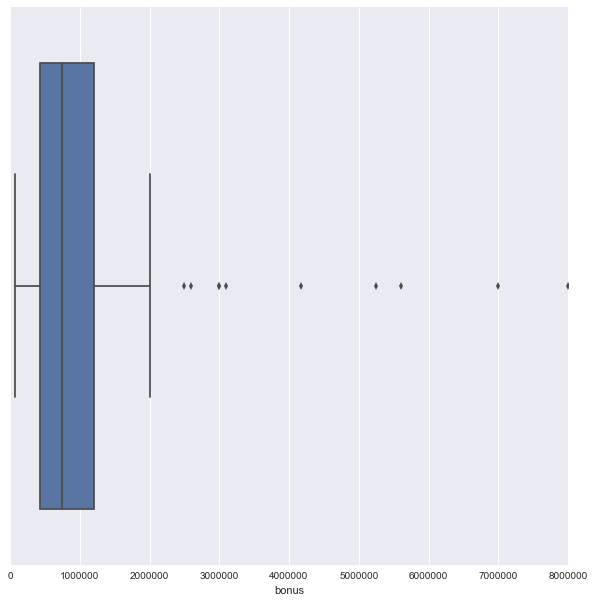

In [197]:
# sns.heatmap(data =heatmap )hindex
# heatmap1 = d11[["name", "salary", "bonus", "exercised_stock_options", "restricted_stock"]]
# 
# hindex = heatmap1.set_index(keys = "name")
# sns.heatmap(data =hindex )
p =sns.boxplot(x = dfp["bonus"])

In [241]:
# heatmap2 = dfp[["name", "salary", "bonus", "exercised_stock_options", "restricted_stock"]]
# heatmap2
# heatmap2 = heatmap2[d11["poi"] == True]
# heatmap2.info()
df_POI = dfp[dfp["poi"] == True]

In [207]:
# sns.heatmap(data =heatmap2 )
heatmap2 = df_POI[["name", "salary", "bonus", "exercised_stock_options", "restricted_stock"]]

In [271]:
col=['salary', 'bonus', 'exercised_stock_options', 'restricted_stock']



h = heatmap2[col].apply(lambda x: x.fillna(x.mean()))
h1 =heatmap2[col].apply(lambda x: x.fillna(x.mean()))

In [274]:
h["name"] = df_POI["name"]

/Users/karansagoo/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:134: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/karansagoo/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:142: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


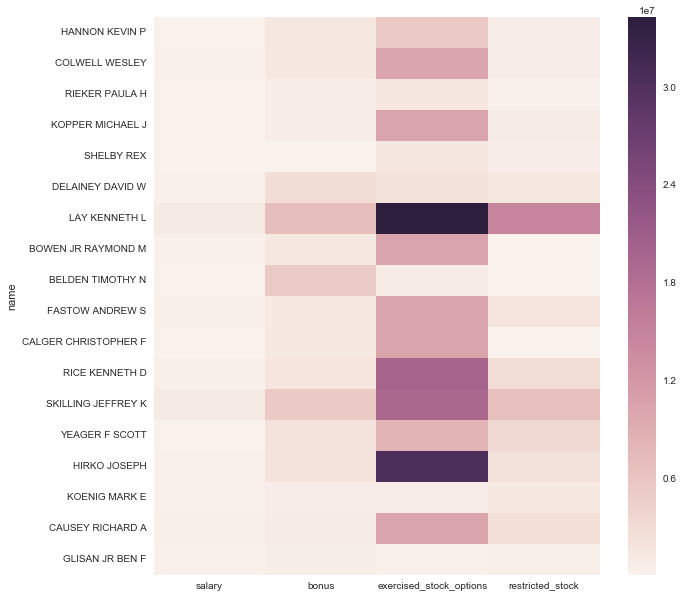

In [275]:
p =h.set_index("name")

sns.heatmap(p)

In [291]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 22 columns):
salary                       94 non-null float64
to_messages                  86 non-null float64
deferral_payments            38 non-null float64
total_payments               124 non-null float64
exercised_stock_options      101 non-null float64
bonus                        81 non-null float64
restricted_stock             109 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    17 non-null float64
total_stock_value            125 non-null float64
expenses                     94 non-null float64
loan_advances                3 non-null float64
from_messages                86 non-null float64
other                        92 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          145 non-null float64
director_fees                16 non-null float64
deferred_income              48 non-null float64
long_term

In [321]:
features = ["poi","name","salary","bonus","exercised_stock_options", "restricted_stock","to_messages","from_poi_to_this_person","from_this_person_to_poi"]
dfp[(dfp["salary"] > 400000) & (dfp.exercised_stock_options > 400000)][features]

,poi,name,salary,bonus,exercised_stock_options,restricted_stock,to_messages,from_poi_to_this_person,from_this_person_to_poi
52,0.0,SHERRIFF JOHN R,428780.0,1500000.0,1835558.0,1293424.0,3187.0,28.0,23.0
57,0.0,WHALLEY LAWRENCE G,510364.0,3000000.0,3282960.0,2796177.0,6019.0,186.0,24.0
65,1.0,LAY KENNETH L,1072321.0,7000000.0,34348384.0,14761694.0,4273.0,123.0,16.0
88,1.0,RICE KENNETH D,420636.0,1750000.0,19794175.0,2748364.0,905.0,42.0,4.0
95,1.0,SKILLING JEFFREY K,1111258.0,5600000.0,19250000.0,6843672.0,3627.0,88.0,30.0
103,0.0,KEAN STEVEN J,404338.0,1000000.0,2022048.0,4131594.0,12754.0,140.0,387.0
127,0.0,DERRICK JR. JAMES V,492375.0,800000.0,8831913.0,1787380.0,2181.0,64.0,20.0
128,0.0,FREVERT MARK A,1060932.0,2000000.0,10433518.0,4188667.0,3275.0,242.0,6.0


In [325]:
dfp[["name","to_messages","from_this_person_to_poi","from_messages","from_poi_to_this_person" ]].head(5)

,name,to_messages,from_this_person_to_poi,from_messages,from_poi_to_this_person
0,METTS MARK,807.0,1.0,29.0,38.0
1,BAXTER JOHN C,NaN,NaN,NaN,NaN
2,ELLIOTT STEVEN,NaN,NaN,NaN,NaN
3,CORDES WILLIAM R,764.0,0.0,12.0,10.0
4,HANNON KEVIN P,1045.0,21.0,32.0,32.0


In [326]:
dfp["ratio_messgs_to_POI"] = dfp["from_this_person_to_poi"]/dfp["to_messages"]
dfp["ratio_messgs_from_POI"] = dfp["from_poi_to_this_person"]/dfp["from_messages"]

In [330]:
# from sklearn.tree import DecisionTreeClassifier
dfp[0::,1::]

TypeError: unhashable type

In [337]:
df1 = dfp
dfp.head(5)

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,name,msgs_sent_ratio_to_POI,ratio_messgs_to_POI,ratio_messgs_from_POI
0,365788.0,807.0,NaN,1061827.0,NaN,600000.0,585062.0,702.0,NaN,585062.0,...,0.0,NaN,NaN,NaN,mark.metts@enron.com,38.0,METTS MARK,0.001239,0.001239,1.310345
1,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,...,0.0,NaN,-1386055.0,1586055.0,NaN,NaN,BAXTER JOHN C,NaN,NaN,NaN
2,170941.0,NaN,NaN,211725.0,4890344.0,350000.0,1788391.0,NaN,NaN,6678735.0,...,0.0,NaN,-400729.0,NaN,steven.elliott@enron.com,NaN,ELLIOTT STEVEN,NaN,NaN,NaN
3,NaN,764.0,NaN,NaN,651850.0,NaN,386335.0,58.0,NaN,1038185.0,...,0.0,NaN,NaN,NaN,bill.cordes@enron.com,10.0,CORDES WILLIAM R,0.000000,0.000000,0.833333
4,243293.0,1045.0,NaN,288682.0,5538001.0,1500000.0,853064.0,1035.0,NaN,6391065.0,...,1.0,NaN,-3117011.0,1617011.0,kevin.hannon@enron.com,32.0,HANNON KEVIN P,0.020096,0.020096,1.000000


In [349]:
df1 = df1.drop(["name","email_address"],axis = 1)

ValueError: labels ['name' 'email_address'] not contained in axis

In [351]:
df1.dtypes[df1.dtypes.map(lambda x: x=='object')]

Series([], dtype: object)

In [354]:
df1.columns.get_loc("poi")

15

In [355]:
df1 = df1.values

In [363]:
df2 = dfp.drop(["name","email_address"],axis = 1)

In [379]:
corr = df2.corr()["poi"][df2.corr()["poi"] < 1].abs()

In [381]:
corr.sort_values(ascending=False)

loan_advances              0.999851
exercised_stock_options    0.503551
total_stock_value          0.366462
bonus                      0.302384
deferred_income            0.265698
salary                     0.264976
long_term_incentive        0.254723
total_payments             0.230692
shared_receipt_with_poi    0.228313
restricted_stock           0.224814
ratio_messgs_from_POI      0.174660
from_poi_to_this_person    0.167722
ratio_messgs_to_POI        0.150463
msgs_sent_ratio_to_POI     0.150463
other                      0.120510
from_this_person_to_poi    0.112940
deferral_payments          0.098428
from_messages              0.074308
expenses                   0.060292
to_messages                0.058954
Name: poi, dtype: float64

In [2]:
features = ["loan_advances", "exercised_stock_options","total_stock_value","bonus","deferred_income","salary","long_term_incentive"]
df2 = df2[features]

NameError: name 'df2' is not defined

In [383]:
df3 = df2.values

In [388]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit
def classify_advanced(features_list, classifiers, 
                      print_result=False, draw_graph=False):
    ### Print out features being classified
    print "Features list:", features_list[1:]
    
    ### Create an empty scores array
    scores = []
    
    ### for each classifier in classifiers calculate scores
    for classifier in classifiers:
        if classifier == "GaussianNB":
            ### set GaussianNB
            clf = GaussianNB()
            
        elif classifier == "DecisionTree":
            ### set Decision Tree
            param_grid = {
                'criterion': ['gini', 'entropy'],
                'splitter' : ['best', 'random'],
                'min_samples_split': range(2,10)
                  }
            clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid)
        
        elif classifier == "SVM":
            from sklearn import svm
            param_grid = {
                'kernel': ['rbf', 'linear', 'poly'],
                'degree': [1,2,3,4,5],
                'gamma': ['auto', 0.1, 0.3, 0.5, 0.7]
                }
            clf = GridSearchCV(svm.SVC(), param_grid)
        
        elif classifier == "KNN":
            from sklearn.neighbors import KNeighborsRegressor
            param_grid = {
                'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto','ball_tree','kd_tree','brute']
            }
            clf = GridSearchCV(KNeighborsRegressor(), param_grid)
        
        elif classifier == "Regression":
            from sklearn.linear_model import LinearRegression
            clf = LinearRegression()
        
        elif classifier == "Lasso":
            from sklearn.linear_model import Lasso
            param_grid = {
                'selection': ['cyclic', 'random']
            }
            clf = GridSearchCV(Lasso(), param_grid)
        
        ### Call test function and print out test
        scores.append(test(
                features_list,clf,
                print_result=print_result, draw_graph=draw_graph, rescale=True))
    
    return scores

In [389]:
classifiers = ['DecisionTree']
ydata = df2[0::,15]
results["DecisionTree"] = classify_advanced(features, classifiers, print_result=True, draw_graph=True)

Features list: ['exercised_stock_options', 'total_stock_value', 'bonus', 'deferred_income', 'salary', 'long_term_incentive']


NameError: global name 'tree' is not defined

In [392]:
y = df3[0::,15]
x = df3[0::,0:14]
x1 = df3[0::,16:20]

In [ ]:
x = np.array([[ 1,  2,  0, -2],
   [ 0,  0,  1,  2],
   [ 0,  0,  0,  0]])

In [395]:
print x

[[ 1  2  0 -2]
 [ 0  0  1  2]
 [ 0  0  0  0]]


In [415]:
cols = [0L, 1L, 2L, 3L, 4L, 'mean']
cols = cols[-1:]+ cols[:-1]

In [14]:
val = []
name = []
for name, features in data_dict.iteritems():
    feat = pd.DataFrame.from_dict(features,orient='index').transpose()
    feat["name"] = name
    val.append(feat)
dft = pd.concat(val)

In [21]:
dft.reset_index("name",drop = True,inplace = True);

In [35]:
dft.head(5)
cols = list(dft.columns)
cols1 = ["poi"] + [col for col in dft if col!= "poi"]

In [37]:
dft = dft[cols1]

In [46]:
dft["poi"] = dft["poi"].map({False: 0,True:1}).astype(int )

In [56]:
dft.to_pickle("/Users/karansagoo/PycharmProjects/Resume/ENRON_final1/data/enron_pd.pkl")